In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:

# Replace with your actual file path
file_path = '/content/drive/MyDrive/Customer Churn/Telco_Cusomer_Churn.csv'

df = pd.read_csv(file_path)
df


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [64]:
df ["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df ["TotalCharges"]=df["TotalCharges"].astype("float")

In [65]:
#Replacing Blanks with 0 as tenure is 0 and no total charges are recorded

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [67]:
df.isnull().sum().sum()

np.int64(0)

In [68]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

In [69]:
df["customerID"].duplicated().sum()

np.int64(0)

In [70]:
def conv(value):
  if value == 1:
    return "yes"
  else:
    return "no"
    df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [71]:
#converted 0 and 1 values of senior citizen to yes/no make it easier to understand

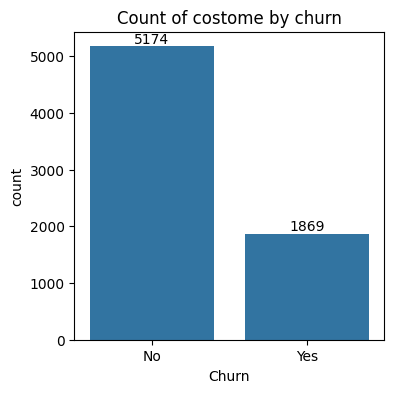

In [72]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(x=df["Churn"], data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of costome by churn")
plt.show()

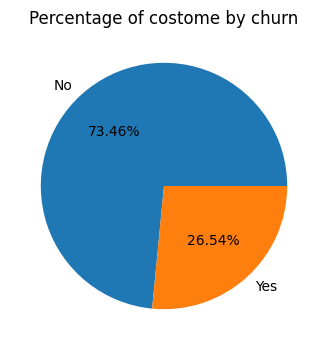

In [73]:
plt.figure(figsize=(4, 4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'] , labels=gb.index, autopct= "%1.2f%%")
plt.title("Percentage of costome by churn")
plt.show()

In [74]:
#from the given pie chart we can conclude that 26.64 of our customer have churend out
#now lets explore the reason behind it

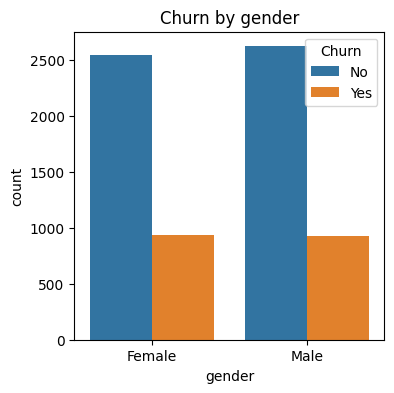

In [75]:
plt.figure(figsize=(4, 4))
sns.countplot(x ="gender", data = df, hue = "Churn")
plt.title("Churn by gender")
plt.show()

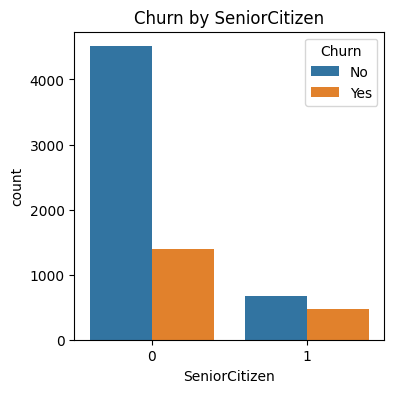

In [76]:
plt.figure(figsize=(4, 4))
sns.countplot(x ="SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

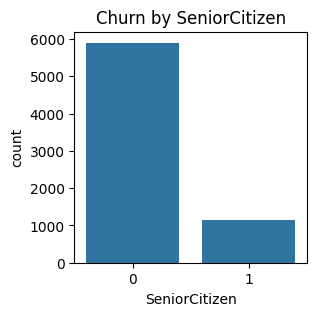

In [77]:
plt.figure(figsize=(3, 3))
sns.countplot(x ="SeniorCitizen", data = df,)
ax.bar_label(ax.containers[0])
plt.title("Churn by SeniorCitizen")
plt.show()

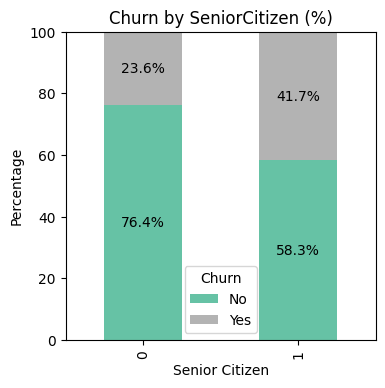

In [78]:
# Calculate counts and percentages
data = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')
total = data.groupby('SeniorCitizen')['Count'].transform('sum')
data['Percent'] = (data['Count'] / total * 100).round(1)

# Pivot to wide format for stacked bar
pivot = data.pivot(index='SeniorCitizen', columns='Churn', values='Percent')

# Plot
ax = pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(4,4),
    colormap='Set2'
)

# Add labels inside bars
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", label_type="center")

plt.title("Churn by SeniorCitizen (%)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.ylim(0,100)  # since percentages
plt.legend(title="Churn")
plt.show()

In [79]:
#comapararive a greater percentage of people in senior citizen catagory have churned

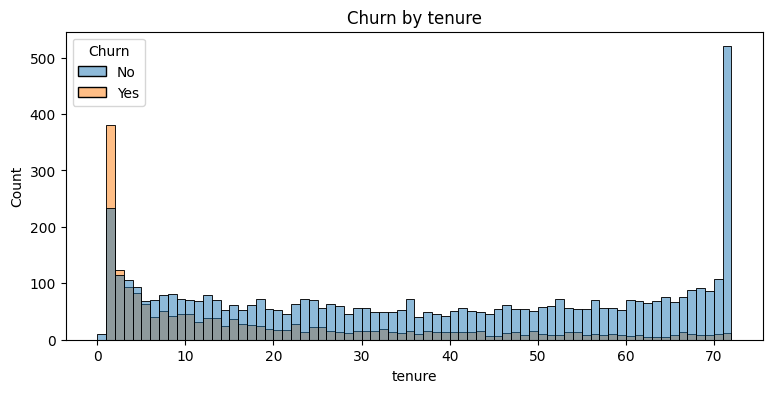

In [80]:
plt.figure(figsize=(9, 4))
sns.histplot(x= "tenure", data = df, bins = 72, hue = "Churn")
plt.title("Churn by tenure")
plt.show()

In [81]:
#perople who have used our services for a long time have stayed and people who have used our services # 1 or 2 months have chunred

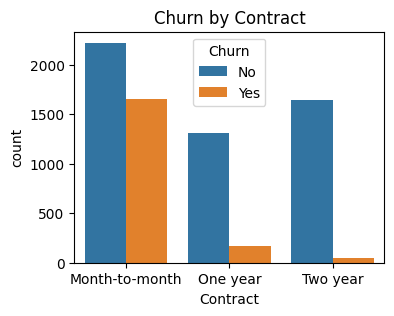

In [82]:
plt.figure(figsize=(4, 3))
sns.countplot(x ="Contract", data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Contract")
plt.show()

In [83]:
#people who have month to month contract are likely to churn from those have 1 and 2 years of contract

In [84]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

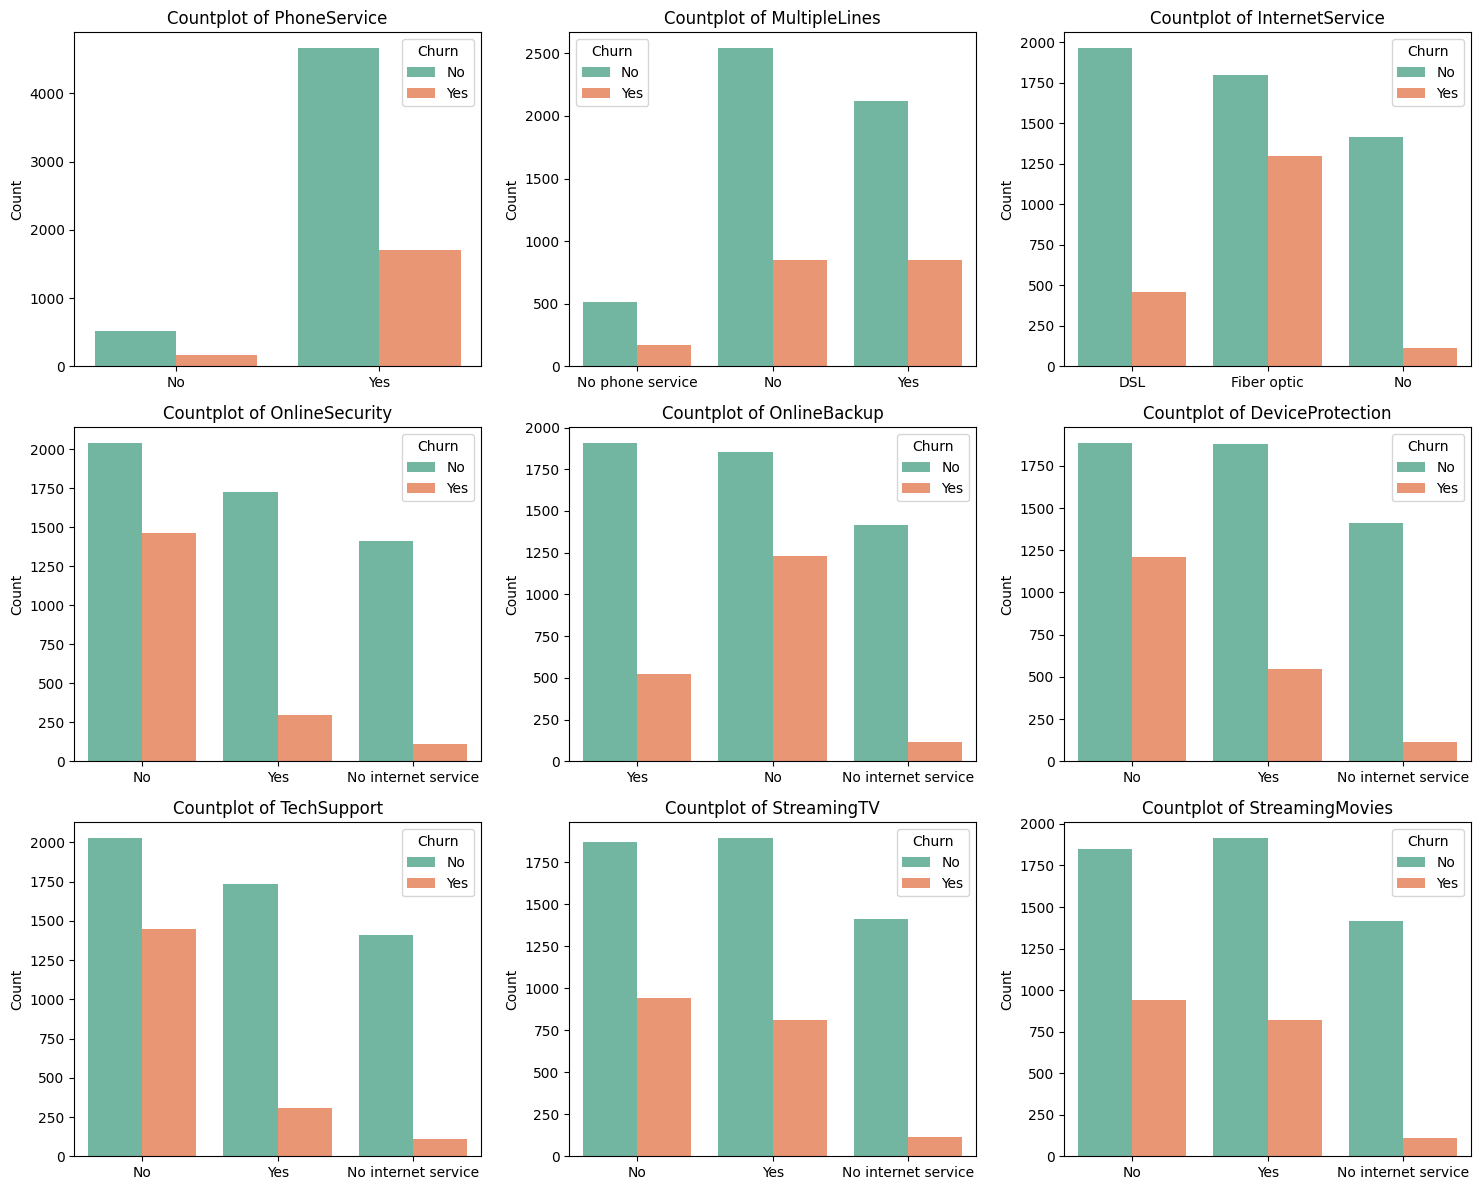

In [85]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Define subplot grid (3 rows x 3 cols for 9 plots)
n_rows, n_cols = 3, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette="Set2", hue = "Churn")
    axes[i].set_title(f"Countplot of {col}")
    axes[i].set_xlabel("")  # optional: remove x-label text
    axes[i].set_ylabel("Count")

# Remove any unused subplots (if cols < grid size)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From the plots, we can see that customers without additional services like OnlineSecurity, TechSupport, and OnlineBackup have a significantly higher churn rate compared to those with these services. Fiber optic internet users also show higher churn compared to DSL users. Overall, customers lacking value-added services are more likely to leave, while those subscribed to multiple support or security services tend to stay.

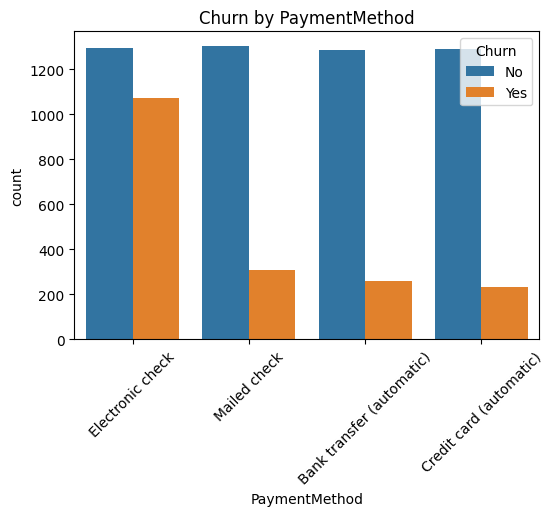

In [93]:
plt.figure(figsize=(6, 4))
sns.countplot(x ="PaymentMethod", data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by PaymentMethod")
plt.xticks(rotation=45)
plt.show()

Customer is likely to churn when he is using electonics check as a payment method